# Experimentation with TDA on Real 3D Data
Topological data analysis on 3D data from Susan's experiments


In [4]:
library(TDA)
library(repr)
library(stringr)
library("scatterplot3d")
library(XLConnect)

Loading required package: XLConnectJars
XLConnect 0.2-15 by Mirai Solutions GmbH [aut],
  Martin Studer [cre],
  The Apache Software Foundation [ctb, cph] (Apache POI),
  Graph Builder [ctb, cph] (Curvesapi Java library)
http://www.mirai-solutions.com
https://github.com/miraisolutions/xlconnect


## Ripser loading and binding

In [5]:
library("ripserr")
options(repr.plot.width=4,repr.plot.height=4)

homologyn <- ripserr::ripser(zSph)

TDA::plot.diagram(homologyn, barcode = FALSE)
TDA::plot.diagram(homologyn, barcode = TRUE)

ERROR: Error in nrow(mat): object 'zSph' not found


In [6]:
## Parse raw output from Ripser
parseOutput = function( output ){
    
    ## Number of intervals by dimension
    indices            = grep( "persistence intervals in dim " , output , value = FALSE )
    maxDimension       = length( indices ) - 1
    indices            = c( indices , length( output ) )
    
    ## Convert output in matrix
    diagram = matrix(, ncol = 3, nrow = 0 )
    
    ## Loop each group of intervals by dimension
    for( dim in 0:maxDimension ){
        
        ## Select intervals
        if( dim == maxDimension ){
            intervals = output[ ( indices[ dim + 1 ] + 1):( indices[ dim + 2 ] ) ]
        }else{
            intervals = output[ ( indices[ dim + 1 ] + 1):( indices[ dim + 2 ] - 1 ) ]
        }
        
        ## Removed lines from output
        intervals = grep( "\\[\\d*\\.?\\d+\\,\\d*\\.?\\d+\\)" , intervals , value = TRUE )
        
        ## Remove punctuation from intervals
        intervals = gsub( "(\\s|\\[|\\))" , "" , intervals )
        
        ## Split interval and convert to numeric
        intervals = as.numeric( unlist( strsplit( intervals , "," ) ) )
        
        ## Convert ouput in matrix
        intervals = matrix( intervals , ncol = 2 , byrow = T )
        
        ## Add dimension column
        intervals = cbind( rep( dim , nrow( intervals ) ) , intervals )
        
        ## Add intervals to diagram
        diagram = rbind( diagram, intervals )
        
    }
    
    ## Format matrix to diagram format
    colnames( diagram ) = c( "dimension" , "Birth" , "Death" )
    
    return( diagram )    
}

## Calculate rips diagram using Ripser library
ripserDiag = function( X, dimension, threshold, format = "point-cloud" ){
    
    # Ripser likes to read files in, so use a temporary file
    f = tempfile()
    write.table(X, f, col.names = FALSE, row.names = FALSE)
    
    ## Set parameters as text
    dimension = as.character( dimension )
    threshold = as.character( threshold )
    
    ## Run Ripser using system command
    ripserOut = system2("/home/dbhaskar92/ripser/ripser", args = c("--dim", dimension, "--threshold", threshold, "--format", format , f), stdout = TRUE)
    
    return( parseOutput( ripserOut ) )
}

In [17]:
#Load the data from the spreadsheets
xD = readWorksheetFromFile('SelectedFeatures/Loop1_w20.xls', sheet = 1)
yD = readWorksheetFromFile('SelectedFeatures/Loop1_w20.xls', sheet = 2)
zD = readWorksheetFromFile('SelectedFeatures/Loop1_w20.xls', sheet = 3)
xD = data.matrix(xD)

xD = xD[,2:dim(xD)[2]]
yD = yD[,2:dim(yD)[2]]
zD = zD[,2:dim(zD)[2]]

In [ ]:
homology2_L1 <- ripserDiag(zSph, 2, 5.0)

### Use ripser to calculate homology of points on a sphere

V1,V2,V3
-0.93227088,-0.1200797,0.34125048
-0.37987010,0.7880244,0.48447524
0.13443244,0.8086335,-0.57274755
0.09519326,0.9711468,0.21866006
-0.80344201,-0.5820879,0.12511842
-0.38989520,-0.7357214,-0.55380124
0.56527812,-0.4814823,-0.66980254
0.62417148,0.7330078,-0.27038775
0.66102540,0.2193245,-0.71759473
0.81465618,0.2030388,0.54324079


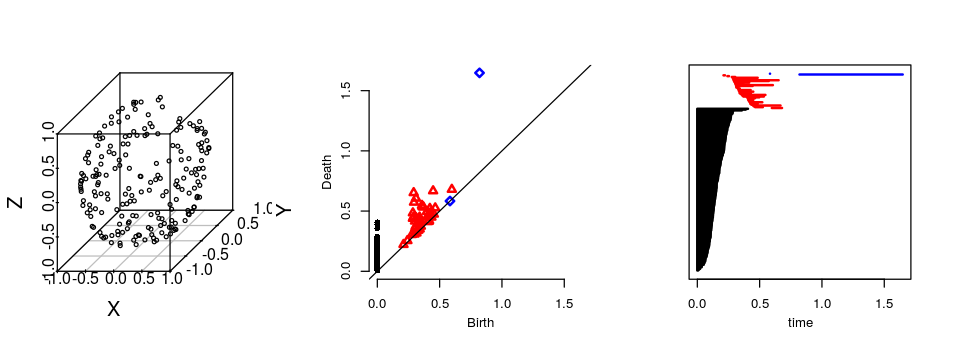

In [19]:
syntheticSph = read.csv(file="Practice3DTDA_Sph.csv",head=FALSE)
zSph = data.matrix(syntheticSph)
zSph

homology0_zSph <- ripserDiag(zSph, 0, 5.0)
homology1_zSph <- ripserDiag(zSph, 1, 5.0)
homology2_zSph <- ripserDiag(zSph, 2, 5.0)

par(mfrow = c(1, 3), mai = c(0.8, 0.8, 0.3, 0.1))
options(repr.plot.width=8,repr.plot.height=3)

scatterplot3d(zSph, y=NULL, z=NULL, xlab="X", ylab="Y", zlab="Z")
TDA::plot.diagram(homology2_zSph, barcode = FALSE)
TDA::plot.diagram(homology2_zSph, barcode = TRUE)

### Use ripser to calculate homology of points on two concentric spheres

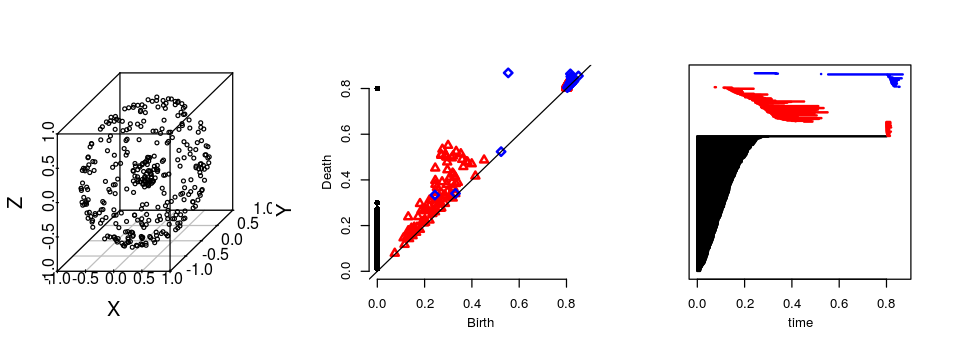

In [46]:
syntheticSph2 = read.csv(file="Practice3DTDA_Sph2.csv",head=FALSE)
zSph2 = data.matrix(syntheticSph2)

homology0_zSph2 <- ripserDiag(zSph2, 0, 10.0)
homology1_zSph2 <- ripserDiag(zSph2, 1, 10.0)
homology2_zSph2 <- ripserDiag(zSph2, 2, 10.0)

par(mfrow = c(1, 3), mai = c(0.8, 0.8, 0.3, 0.1))
options(repr.plot.width=8,repr.plot.height=3)

scatterplot3d(x=zSph2, y=NULL, z=NULL, xlab="X", ylab="Y", zlab="Z")
TDA::plot.diagram(homology2_zSph2, barcode = FALSE)
TDA::plot.diagram(homology2_zSph2, barcode = TRUE)

### Use ripser to calculate homology of points on three concentric spheres

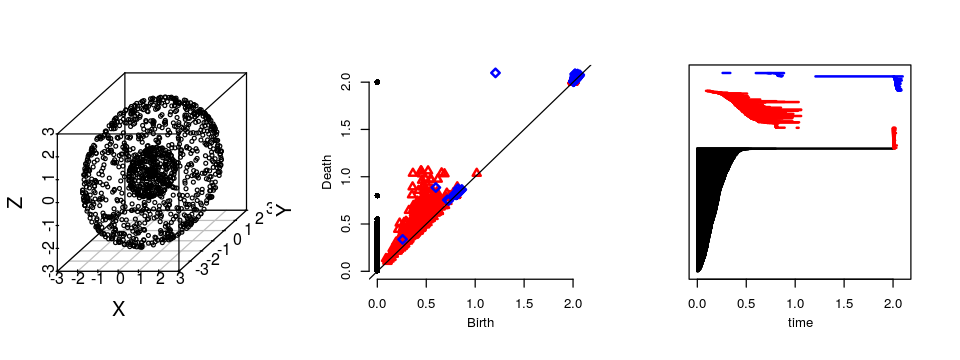

In [47]:
syntheticSPH3 = read.csv(file="Practice3DTDA_Sph3.csv",head=FALSE)
zSph3 = data.matrix(syntheticSPH3)

homology2_zSph3 <- ripserDiag(zSph3, 2, 5)

par(mfrow = c(1, 3), mai = c(0.8, 0.8, 0.3, 0.1))
options(repr.plot.width=8,repr.plot.height=3)

scatterplot3d(x=zSph3, y=NULL, z=NULL, xlab="X", ylab="Y", zlab="Z")
TDA::plot.diagram(homology2_zSph3, barcode = FALSE)
TDA::plot.diagram(homology2_zSph3, barcode = TRUE)

In [27]:
 print(bottleneck(homology0_zSph, homology0_zSph2, dimension = 0))
 print(bottleneck(homology1_zSph, homology1_zSph2, dimension = 1))
 print(bottleneck(homology2_zSph, homology2_zSph2, dimension = 2))

[1] 0.400022
[1] 0.081757
[1] 0.509713


In [32]:
 print(wasserstein(homology0_zSph, homology0_zSph2, dimension = 0,p=2))
 print(wasserstein(homology1_zSph, homology1_zSph2, dimension = 1,p=2))
 print(wasserstein(homology2_zSph, homology2_zSph2, dimension = 2,p=2))

[1] 0.4456591
[1] 0.0899068
[1] 0.2881303


- get alpha on the drawing elements
- silouettes and landscapes, eventually want mean landscape with 95% condiecne band (3.8)

# 3.0 Synthetic Torus data

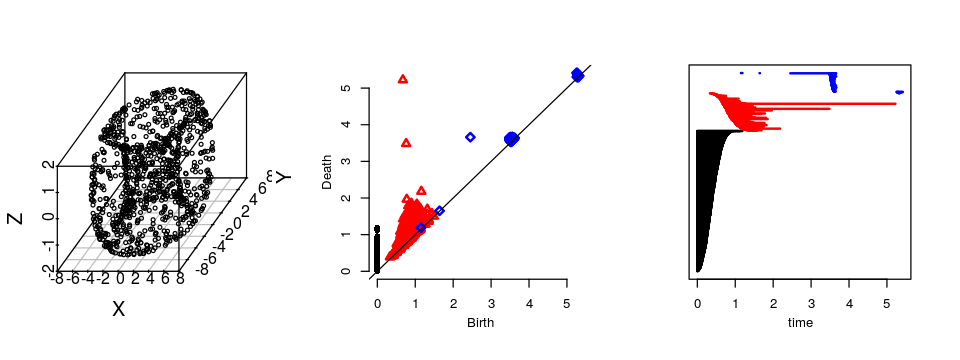

In [48]:
syntheticTorus1 = read.csv(file="Practice3DTDA_Torus2.csv",head=FALSE)
zTorus1 = data.matrix(syntheticTorus1)

par(mfrow = c(1, 3), mai = c(0.8, 0.8, 0.3, 0.1))
options(repr.plot.width=8,repr.plot.height=3)

homology2_zTorus1 <- ripserDiag(zTorus1, 2, 10)

scatterplot3d(zTorus1, y=NULL, z=NULL, xlab="X", ylab="Y", zlab="Z")
TDA::plot.diagram(homology2_zTorus1, barcode = FALSE)
TDA::plot.diagram(homology2_zTorus1, barcode = TRUE)

# 4 Dynamic data of points moving about in a circle. 
## 4.0 Radial Noise Parameter = 0

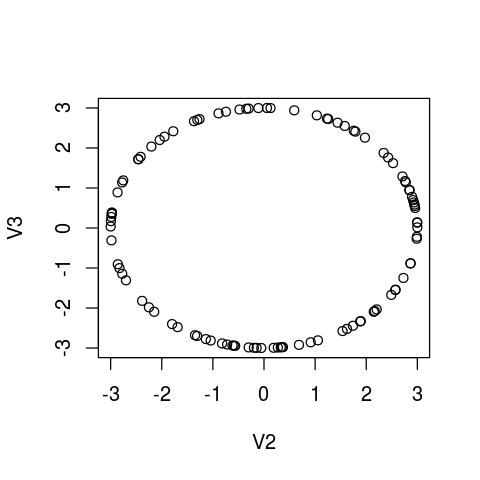

In [5]:
dynamicNoise0 = read.csv(file="Dynamic2DNoise0.csv",head=FALSE)
dyN0 = data.matrix(dynamicNoise0)
dyN0 = dyN0[,2:3]
#options(repr.plot.width=5, repr.plot.height=5)
plot(dyN0)
homology1_dyNo <- ripserDiag(dyN0, 1, 10)

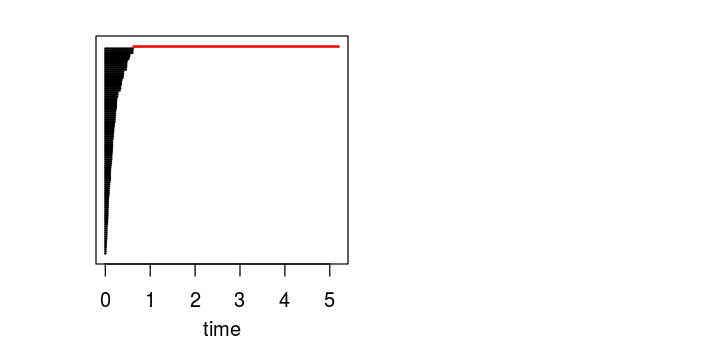

In [6]:
options(repr.plot.width=6,repr.plot.height=3)
par(mfrow = c(1, 2), mai = c(0.8, 0.8, 0.3, 0.1))

TDA::plot.diagram(homology1_dyNo, barcode = TRUE)

## 4.1 Radial Noise Parameter = 0.1

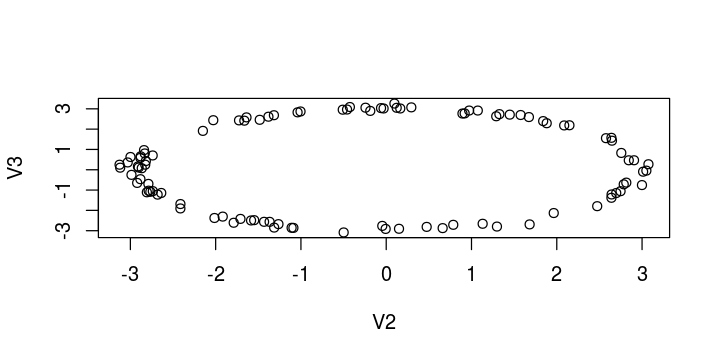

In [7]:
dynamicNoise01 = read.csv(file="Dynamic2DNoise0.1.csv",head=FALSE)
dyN01 = data.matrix(dynamicNoise01)
dyN01 = dyN01[,2:3]
#options(repr.plot.width=5, repr.plot.height=5)
plot(dyN01)
homology1_dyN01 <- ripserDiag(dyN01, 1, 10)

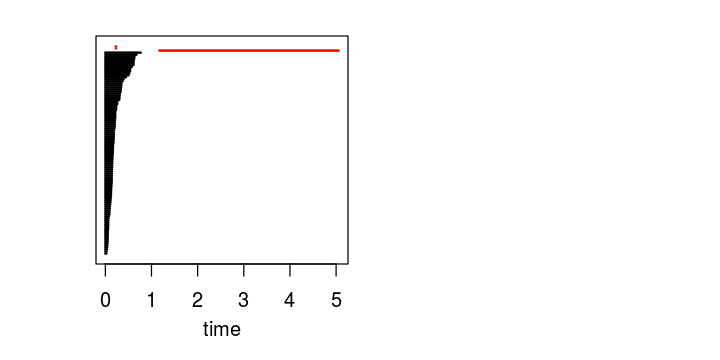

In [8]:
options(repr.plot.width=6,repr.plot.height=3)
par(mfrow = c(1, 2), mai = c(0.8, 0.8, 0.3, 0.1))

TDA::plot.diagram(homology1_dyN01, barcode = TRUE)

## 4.2 Radial Noise Parameter = 0.3

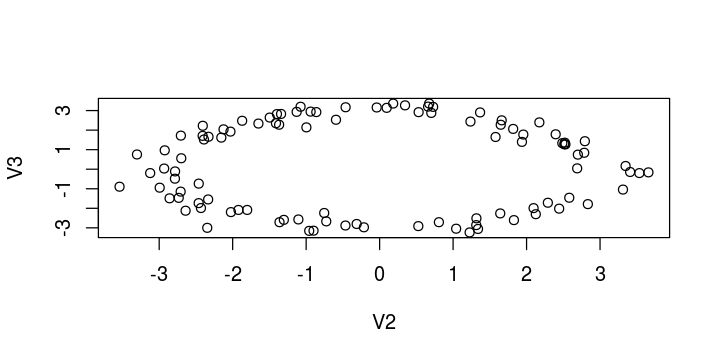

In [32]:
dynamicNoise03 = read.csv(file="Dynamic2DNoise0.3.csv",head=FALSE)
dyN03 = data.matrix(dynamicNoise03)
dyN03 = dyN03[,2:3]
#options(repr.plot.width=5, repr.plot.height=5)
plot(dyN03)
homology1_dyN03 <- ripserDiag(dyN03, 1, 10)

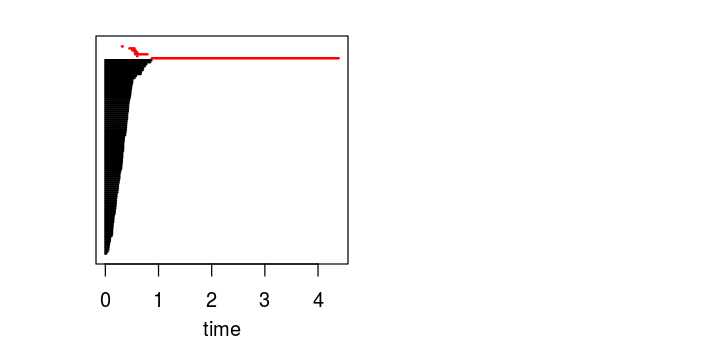

In [34]:
options(repr.plot.width=6,repr.plot.height=3)
par(mfrow = c(1, 2), mai = c(0.8, 0.8, 0.3, 0.1))

TDA::plot.diagram(homology1_dyN03, barcode = TRUE)

## 4.3 Radial Noise Parameter = 0.7

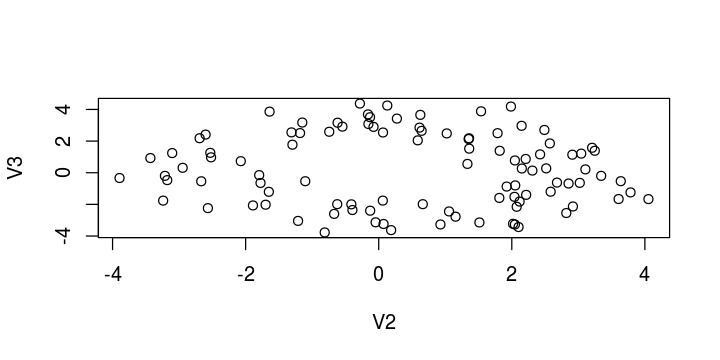

In [35]:
dynamicNoise07 = read.csv(file="Dynamic2DNoise0.7.csv",head=FALSE)
dyN07 = data.matrix(dynamicNoise07)
dyN07 = dyN07[,2:3]
#options(repr.plot.width=5, repr.plot.height=5)
plot(dyN07)
homology1_dyN07 <- ripserDiag(dyN07, 1, 10)

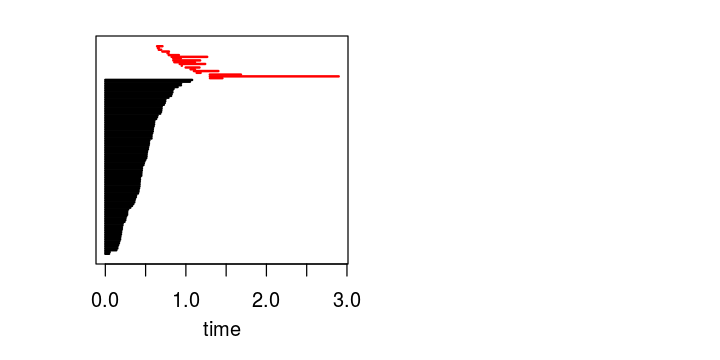

In [36]:
options(repr.plot.width=6,repr.plot.height=3)
par(mfrow = c(1, 2), mai = c(0.8, 0.8, 0.3, 0.1))

TDA::plot.diagram(homology1_dyN07, barcode = TRUE)

## 4.4 Radial Noise Parameter = 1.2

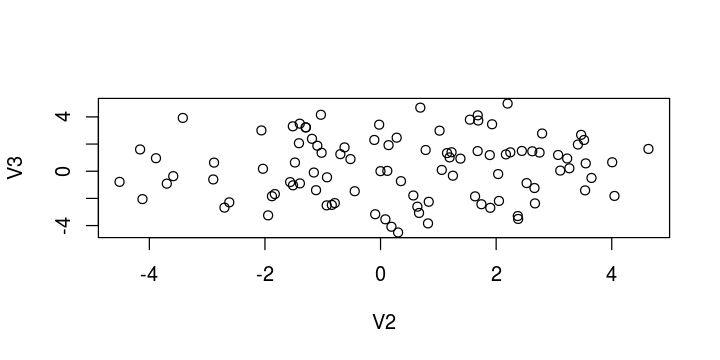

In [9]:
dynamicNoise12 = read.csv(file="Dynamic2DNoise1.2.csv",head=FALSE)
dyN12 = data.matrix(dynamicNoise12)
dyN12 = dyN12[,2:3]
#options(repr.plot.width=5, repr.plot.height=5)
plot(dyN12)
homology1_dyN12 <- ripserDiag(dyN12, 1, 10)

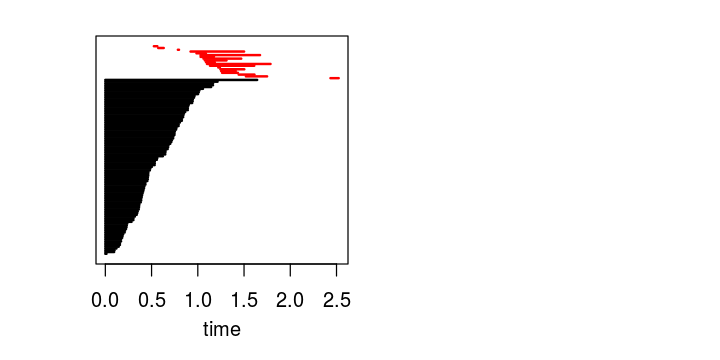

In [10]:
options(repr.plot.width=6,repr.plot.height=3)
par(mfrow = c(1, 2), mai = c(0.8, 0.8, 0.3, 0.1))

TDA::plot.diagram(homology1_dyN12, barcode = TRUE)